# 셀프 주유소는 정말 저렴할까?
## 서울시 구별 주유소 가격 정보 얻기

In [1]:
from selenium import webdriver

In [ ]:
driver = webdriver.Chrome('d:/Development/ChromeDriver/chromedriver')
driver.get('http://www.opinet.co.kr/searRgSelect.do')

### 서울시 구별 주유가격 데이터 구하기

In [11]:
driver.get('https://goo.gl/VH1A5t')

In [12]:
xpath = '//*[@id="SIGUNGU_NM0"]'
gu_list_raw = driver.find_element_by_xpath(xpath)
gu_list_raw

<selenium.webdriver.remote.webelement.WebElement (session="6d8da9896b7f8b4f4f3542a25f66df13", element="b1cb6218-cde1-44ed-8798-255de69828cc")>

In [14]:
gu_list = gu_list_raw.find_elements_by_tag_name('option')
gu_list

[<selenium.webdriver.remote.webelement.WebElement (session="6d8da9896b7f8b4f4f3542a25f66df13", element="258758cb-da6c-4a08-917c-db2ed45d2b38")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6d8da9896b7f8b4f4f3542a25f66df13", element="2eb3a4c9-49e3-4d64-aafb-1250a6bd4b30")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6d8da9896b7f8b4f4f3542a25f66df13", element="0f4fad4e-4970-4c3f-abfe-464d3e3a1f4c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6d8da9896b7f8b4f4f3542a25f66df13", element="361fa9ff-fb0b-41d0-af4e-b6e05d65a509")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6d8da9896b7f8b4f4f3542a25f66df13", element="c622cb41-e492-471f-a772-2f11eafad199")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6d8da9896b7f8b4f4f3542a25f66df13", element="893a1994-84a8-4059-ba25-7ffcc83e846f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6d8da9896b7f8b4f4f3542a25f66df13", element="fb7ce3b9-606f-4d70-8a56-1f

In [15]:
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [16]:
element = driver.find_element_by_id('SIGUNGU_NM0')
element.send_keys(gu_names[0])

In [17]:
xpath ='//*[@id="searRgSelect"]/span'
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [18]:
xpath ='//*[@id="glopopd_excel"]/span'
element_get_excel = driver.find_element_by_xpath(xpath).click()

In [21]:
import time
from tqdm import tqdm_notebook
import shutil, os

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath ='//*[@id="searRgSelect"]/span'
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(2)
    
    xpath ='//*[@id="glopopd_excel"]/span'
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(2)
    
    src = 'C:/Users/ckkim/Downloads/지역_위치별(주유소).xls'
    dst_dir = 'd:/Workspace/TIL/03.Crawling/gu_data/'
    shutil.move(src, dst_dir + gu + '.xls')
    
    time.sleep(2)

In [32]:
driver.close()

### 구별 주유 가격 데이터 정리

In [89]:
path = './gu_data'
station_list = os.listdir(path)

In [90]:
import pandas as pd

tmp_raw = []
for filename in station_list:
    tmp = pd.read_excel(dst_dir+filename, header=2)
    tmp_raw.append(tmp)
    
tmp_raw

[       지역                    상호                            주소      상표  \
 0   서울특별시        현대오일뱅크 도곡셀프주유소     서울 강남구  남부순환로 2718 (도곡2동)  현대오일뱅크   
 1   서울특별시       현대오일뱅크(주) 유진주유소          서울 강남구 논현로 152 (도곡동)  현대오일뱅크   
 2   서울특별시      GS칼텍스(주)직영 산성주유소          서울 강남구 헌릉로 730 (세곡동)   GS칼텍스   
 3   서울특별시                 방죽주유소      서울특별시 강남구 밤고개로 215 (율현동)   S-OIL   
 4   서울특별시           (주)보성 세곡주유소      서울특별시 강남구  헌릉로 731 (세곡동)   SK에너지   
 5   서울특별시         SK에너지㈜ 진달래주유소                서울 강남구 도곡로 208   SK에너지   
 6   서울특별시               SK서광주유소          서울 강남구 역삼로 142 (역삼동)   SK에너지   
 7   서울특별시               자곡셀프주유소         서울 강남구 밤고개로 120 (자곡동)   SK에너지   
 8   서울특별시            (주)선진도곡주유소          서울 강남구 도곡로 162 (도곡동)   S-OIL   
 9   서울특별시      에쓰-오일(주)직영개나리주유소      서울특별시 강남구  언주로 423 (역삼동)   S-OIL   
 10  서울특별시                 일원주유소        서울 강남구 양재대로55길 3 (일원동)   S-OIL   
 11  서울특별시         주)중앙에너비스 수서지점      서울특별시 강남구  광평로 202 (수서동)   SK에너지   
 12  서울특별시       SK네트웍스(주) 매봉주유소      

In [91]:
len(tmp_raw)

25

In [92]:
station_raw = pd.concat(tmp_raw)

In [93]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 15
Data columns (total 10 columns):
지역       504 non-null object
상호       504 non-null object
주소       504 non-null object
상표       504 non-null object
전화번호     504 non-null object
셀프여부     504 non-null object
고급휘발유    504 non-null object
휘발유      504 non-null object
경유       504 non-null object
실내등유     504 non-null object
dtypes: object(10)
memory usage: 43.3+ KB


In [94]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,1733,1548,1404,-
1,서울특별시,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),현대오일뱅크,02-3462-5215,N,1749,1563,1419,1190
2,서울특별시,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730 (세곡동),GS칼텍스,02-2226-4963,Y,-,1567,1423,-
3,서울특별시,방죽주유소,서울특별시 강남구 밤고개로 215 (율현동),S-OIL,02-459-3434,Y,-,1569,1429,-
4,서울특별시,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1572,1424,-


In [95]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'],
                         '주소':station_raw['주소'],
                         '가격':station_raw['휘발유'],
                         '셀프여부':station_raw['셀프여부'],
                         '상표':station_raw['상표']})
stations.head()

,Oil_store,주소,가격,셀프여부,상표
0,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1548,Y,현대오일뱅크
1,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),1563,N,현대오일뱅크
2,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730 (세곡동),1567,Y,GS칼텍스
3,방죽주유소,서울특별시 강남구 밤고개로 215 (율현동),1569,Y,S-OIL
4,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1572,Y,SK에너지


In [96]:
stations['구'] = [addr.split()[1] for addr in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프여부,상표,구
0,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1548,Y,현대오일뱅크,강남구
1,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),1563,N,현대오일뱅크,강남구
2,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730 (세곡동),1567,Y,GS칼텍스,강남구
3,방죽주유소,서울특별시 강남구 밤고개로 215 (율현동),1569,Y,S-OIL,강남구
4,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1572,Y,SK에너지,강남구


In [97]:
stations['구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [98]:
stations['가격'].unique()

array(['1548', '1563', '1567', '1569', '1572', '1575', '1597', '1617',
       '1627', '1628', '1629', '1635', '1636', '1637', '1652', '1653',
       '1657', '1665', '1683', '1687', '1743', '1797', '1827', '1850',
       '1876', '1885', '1898', '1929', '1938', '1947', '1984', '1989',
       '1995', '1998', '1999', '2218', '-', 1546, 1557, 1559, 1573, 1578,
       1579, 1588, 1598, 1599, 1619, 1629, 1638, 1639, 1648, 1688, 1983,
       1479, 1489, 1494, 1499, 1506, 1518, 1528, 1534, 1539, 1547, 1456,
       1467, 1486, 1487, 1488, 1498, 1507, 1508, 1515, 1517, 1519, 1524,
       1529, 1535, 1540, 1549, 1568, 1615, 1698, 1755, 1817, 1527, 1556,
       1558, 1564, 1575, 1584, 1604, 1684, 1509, 1537, 1538, 1589, 1595,
       1625, 1675, 1469, 1495, 1497, 1569, 1576, 1582, 1626, 1645, 1768,
       2064, 1484, 1485, 1545, 1699, 1533, 1596, 1597, 1680, 1681, 1709,
       1609, 1628, 1656, 1992, 1473, 1482, 1514, 1516, 1525, 1543, 1554,
       1572, 1635, '1577', '1587', '1618', '1697', '1724',

In [99]:
stations = stations[stations['가격'] != '-']
stations['가격'] = [float(value) for value in stations['가격']]
stations.head()

,Oil_store,주소,가격,셀프여부,상표,구
0,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1548.0,Y,현대오일뱅크,강남구
1,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),1563.0,N,현대오일뱅크,강남구
2,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730 (세곡동),1567.0,Y,GS칼텍스,강남구
3,방죽주유소,서울특별시 강남구 밤고개로 215 (율현동),1569.0,Y,S-OIL,강남구
4,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1572.0,Y,SK에너지,강남구


In [100]:
# 25개 파일을 합쳐서 만들었기 때문에 Index를 정리해 주어야 함
stations.reset_index(inplace=True)
del stations['index']

In [101]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 6 columns):
Oil_store    496 non-null object
주소           496 non-null object
가격           496 non-null float64
셀프여부         496 non-null object
상표           496 non-null object
구            496 non-null object
dtypes: float64(1), object(5)
memory usage: 23.4+ KB


### 셀프 주유소는 정말 저렴한지 boxplot으로 확인하기

In [102]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False   # minus 표시
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10

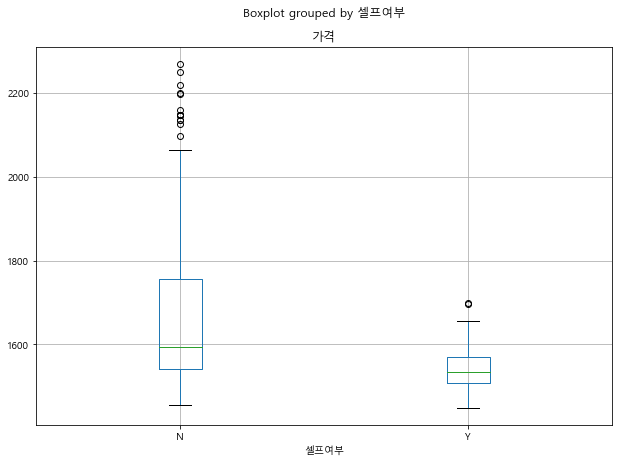

In [103]:
stations.boxplot(column='가격', by='셀프여부', figsize=(10, 7))

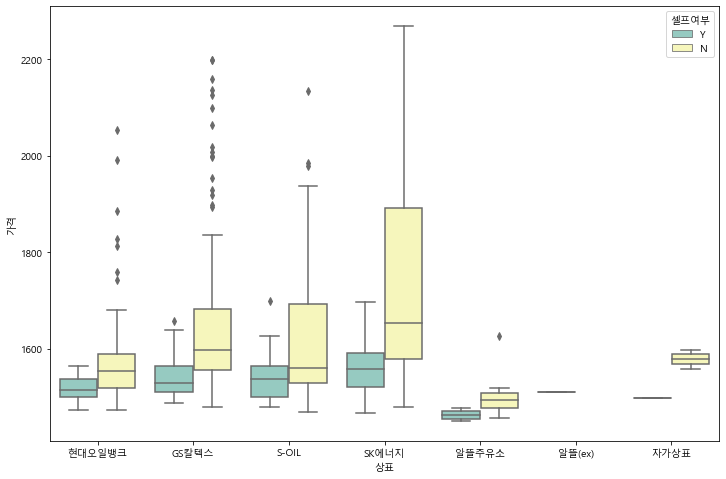

In [104]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='상표', y='가격', hue='셀프여부', data=stations, palette='Set3')
plt.show()

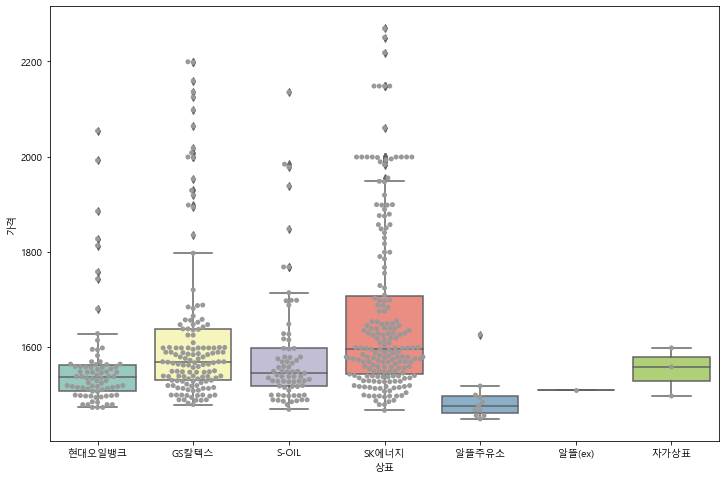

In [105]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='상표', y='가격', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=stations, color='.6')
plt.show()

### 서울특별시 구별 주유가격 확인하기

In [106]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [107]:
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프여부,상표,구
479,서남주유소,서울 중구 통일로 30,2269.0,N,SK에너지,중구
478,장충주유소,서울 중구 장충단로 202 (장충동1가),2250.0,N,SK에너지,중구
39,뉴서울(강남),서울 강남구 언주로 716 (논현동),2218.0,N,SK에너지,강남구
477,필동주유소,서울 중구 퇴계로 196 (필동2가),2199.0,N,GS칼텍스,중구
476,SC(주) 역전주유소,서울 중구 퇴계로 15,2198.0,N,GS칼텍스,중구
475,지에스칼텍스(주)초동주유소,서울 중구 마른내로 31,2159.0,N,GS칼텍스,중구
441,한남지점,서울 용산구 한남대로21길 4 (한남동),2148.0,N,SK에너지,용산구
467,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2148.0,N,SK에너지,종로구
440,에너비스,서울 용산구 한남대로 82 (한남동),2148.0,N,SK에너지,용산구
474,(주)중앙에너비스 퇴계로지점,서울 중구 퇴계로 228 (필동2가),2148.0,N,SK에너지,중구


In [108]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프여부,상표,구
395,도림주유소,서울 영등포구 도림로 343 (도림동),1449.0,Y,알뜰주유소,영등포구
70,뉴신정주유소,서울특별시 강서구 곰달래로39길 10 (화곡동),1456.0,N,알뜰주유소,강서구
69,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1456.0,Y,알뜰주유소,강서구
71,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1467.0,Y,SK에너지,강서구
72,유턴주유소,서울 강서구 남부순환로 57,1467.0,Y,알뜰주유소,강서구
317,원천주유소,서울 성북구 돌곶이로 142 (장위동),1468.0,N,알뜰주유소,성북구
136,처음처럼주유소,서울 구로구 오리로 1299 (궁동),1469.0,N,S-OIL,구로구
205,배봉로주유소,서울 동대문구 서울시립대로 108,1473.0,Y,현대오일뱅크,동대문구
206,재정주유소,서울 동대문구 전농로 121 (전농동),1473.0,N,현대오일뱅크,동대문구
207,재정제2주유소,서울 동대문구 사가정로 90 (전농동),1473.0,Y,현대오일뱅크,동대문구


In [109]:
import numpy as np
gu_data = pd.pivot_table(stations, index=['구'], values=['가격'],
                         aggfunc=np.mean)
gu_data.head().round(2)

,가격
구,
강남구,1761.00
강동구,1626.31
강북구,1514.23
강서구,1538.15
관악구,1576.12


In [110]:
geo_path = './data/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5,
                 titles='Stamen Toner')
map.choropleth(geo_data = geo_data,
               data = gu_data,
               columns = [gu_data.index, '가격'],
               fill_color = 'PuRd',
               key_on = 'feature.id')
map

### 서울특별시 주유가격 상하위 10개 주유소 지도에 표시하기

In [111]:
price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)

In [72]:
gmap_key = '****'

In [112]:
gmaps = googlemaps.Client(key=gmap_key)

In [113]:
lat = []
lng = []

for n in tqdm_notebook(price_top10.index):
    try:
        tmp_add = str(price_top10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        
price_top10['lat'] = lat
price_top10['lng'] = lng
price_top10

,Oil_store,주소,가격,셀프여부,상표,구,lat,lng
479,서남주유소,서울 중구 통일로 30,2269.0,N,SK에너지,중구,37.558348,126.972090
478,장충주유소,서울 중구 장충단로 202 (장충동1가),2250.0,N,SK에너지,중구,37.562719,127.007010
39,뉴서울(강남),서울 강남구 언주로 716 (논현동),2218.0,N,SK에너지,강남구,37.517636,127.035756
477,필동주유소,서울 중구 퇴계로 196 (필동2가),2199.0,N,GS칼텍스,중구,37.560850,126.993653
476,SC(주) 역전주유소,서울 중구 퇴계로 15,2198.0,N,GS칼텍스,중구,37.557001,126.974495
475,지에스칼텍스(주)초동주유소,서울 중구 마른내로 31,2159.0,N,GS칼텍스,중구,37.564944,126.991136
441,한남지점,서울 용산구 한남대로21길 4 (한남동),2148.0,N,SK에너지,용산구,37.534657,127.006063
467,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2148.0,N,SK에너지,종로구,37.586068,127.001058
440,에너비스,서울 용산구 한남대로 82 (한남동),2148.0,N,SK에너지,용산구,37.535952,127.006130
474,(주)중앙에너비스 퇴계로지점,서울 중구 퇴계로 228 (필동2가),2148.0,N,SK에너지,중구,37.561648,126.997142


In [114]:
price_top10['lat']

479    37.558348
478    37.562719
39     37.517636
477    37.560850
476    37.557001
475    37.564944
441    37.534657
467    37.586068
440    37.535952
474    37.561648
Name: lat, dtype: float64

In [115]:
lat = []
lng = []

for n in tqdm_notebook(price_bottom10.index):
    try:
        tmp_add = str(price_bottom10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        
price_bottom10['lat'] = lat
price_bottom10['lng'] = lng
price_bottom10

,Oil_store,주소,가격,셀프여부,상표,구,lat,lng
395,도림주유소,서울 영등포구 도림로 343 (도림동),1449.0,Y,알뜰주유소,영등포구,37.507656,126.900191
70,뉴신정주유소,서울특별시 강서구 곰달래로39길 10 (화곡동),1456.0,N,알뜰주유소,강서구,37.531820,126.855564
69,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1456.0,Y,알뜰주유소,강서구,37.540657,126.841506
71,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1467.0,Y,SK에너지,강서구,37.555284,126.768567
72,유턴주유소,서울 강서구 남부순환로 57,1467.0,Y,알뜰주유소,강서구,37.557144,126.810013
317,원천주유소,서울 성북구 돌곶이로 142 (장위동),1468.0,N,알뜰주유소,성북구,37.614921,127.052752
136,처음처럼주유소,서울 구로구 오리로 1299 (궁동),1469.0,N,S-OIL,구로구,37.497354,126.828954
205,배봉로주유소,서울 동대문구 서울시립대로 108,1473.0,Y,현대오일뱅크,동대문구,37.580008,127.051056
206,재정주유소,서울 동대문구 전농로 121 (전농동),1473.0,N,현대오일뱅크,동대문구,37.575653,127.057412
207,재정제2주유소,서울 동대문구 사가정로 90 (전농동),1473.0,Y,현대오일뱅크,동대문구,37.575785,127.055636


In [116]:
price_bottom10['lat']

395    37.507656
70     37.531820
69     37.540657
71     37.555284
72     37.557144
317    37.614921
136    37.497354
205    37.580008
206    37.575653
207    37.575785
Name: lat, dtype: float64

In [119]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5)

for i in price_top10.index:
    folium.CircleMarker([price_top10['lat'][i], price_top10['lng'][i]],
                        radius=15, color='#CD3181',
                        fill_color='#CD3181').add_to(map)
        
for i in price_bottom10.index:
    folium.CircleMarker([price_bottom10['lat'][i], price_bottom10['lng'][i]],
                        radius=15, color='#3186CC',
                        fill_color='#3186CC').add_to(map)
        
map